- Mapear codigos a descripciones(0:Si, 1:No)
- Slice DF, ejemplos
- Shape


Este notebook se realizó tomando como base:
- https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution
- https://www.kaggle.com/sulianova/eda-cardiovascular-data

## EDA de datos de enfermedades cardiovasculares

El dataset contiene 70.000 registros de pacientes en 12 variables o _features_ (edad, sexo, systolic blood pressure, diastolic blood pressure, and etc). La clase "cardio" toma el valor 1 cuando el paciente tuvo una enfermedad cardiovascular y 0 si el paciente es saludable.

#### Descripción de los datos

Hay 3 tipos de variablesut features:

- *Objetivas*: factual information;
- *caracteristica de examen*: results of medical examination;
- *subjetivas*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


### Analisis inicial

In [58]:
# import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# import os
df = pd.read_csv("cardio_train.csv",sep=";")

In [62]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,normal,normal,No,No,Yes,0
1,1,20228,1,156,85.0,140,90,well above normal,normal,No,No,Yes,1
2,2,18857,1,165,64.0,130,70,well above normal,normal,No,No,No,1
3,3,17623,2,169,82.0,150,100,normal,normal,No,No,Yes,1
4,4,17474,1,156,56.0,100,60,normal,normal,No,No,No,0


In [40]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

#### Análisis univariado
Para comenzar a entender los datos, primero necesitamos saber que tipo de datos son. Esto se realiza con la función `info()`:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Todas las variables o _features_ son numéricas, 12 _integers_ y 1 número decimal (weight). La segunda columna nos da una idea del tamaño del dataset y cuantas observaciones no contienen valores nulos. Podemos utilizar `describe()` para mostrar algunas estadísticas como `min`, `max`, `mean`,`std` para cada variable (numérica):

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Convertimos `age`, expresada en dias, en años.

In [18]:
df['age_year'] = round(df['age']/365,0)

Asignamos valores de un diccionario a las escalas

- Alternativa I:

In [19]:
dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df['cholesterol'] = df['cholesterol'].map(dict)

dict = {1: 'CVD', 0: 'No CVD'}
df['cardio'] = df['cardio'].map(dict)

- Alternativa II

In [46]:
cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']
dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}

# Iteramos por la lista de variables a las cuales le reemplazamos el valor
for col in cols:
    df[col] = df[col].map(dict)

- Alternativa III

In [60]:
def replace_dict(cols,dict):
    for col in cols:
        print(dict)
        df[col] = df[col].map(dict)

In [61]:
col_cg = ['cholesterol', 'gluc']
dict_cg = {1: 'normal', 2: 'above normal', 3: 'well above normal'}

col_saa = ['smoke', 'alco', 'active']
dict_saa = {0:'No', 1:'Yes'}

replace_dict(col_cg,dict_cg)
replace_dict(col_saa,dict_saa)

{1: 'normal', 2: 'above normal', 3: 'well above normal'}
{1: 'normal', 2: 'above normal', 3: 'well above normal'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}


La edad(age) está medida en días, la altura(height) en centímetros. 
Vamos a analizar como se compartan las variables según el valor de la clase objetivo.

Por ejemplo, a que edad el número de personas con CVD es mayor al número de personas sin CVD?

<AxesSubplot:xlabel='years', ylabel='count'>

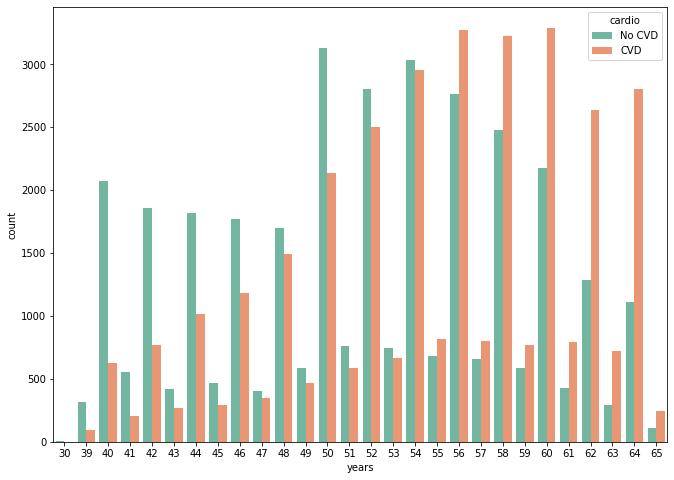

In [16]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data=df, palette="Set2")

Se observa qeu las personas mayores de 55 años se encuentran más expuestas al CVD.
En la tabla podemos ver qeu existen _outliers_ en `ap_hi`, `ap_lo`, `weight` y `height`. Trabajaremos con esas observaciones mas adelante.

Veamos las variables categóricas y su distribución:

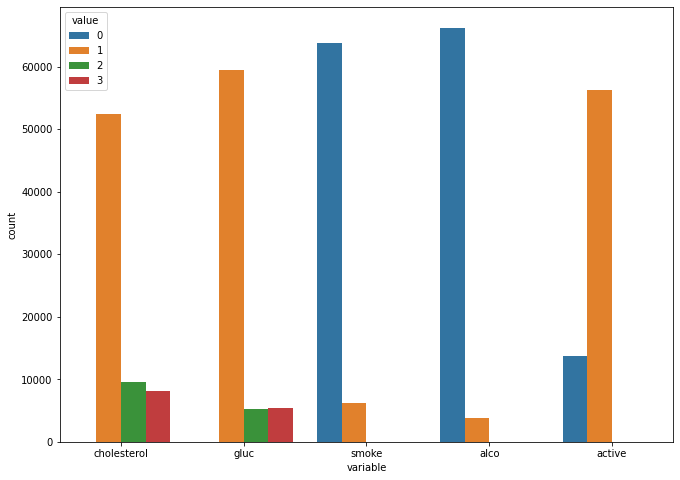

In [7]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

#### Analisis bivariado

Es útil mostrar las variables categóricas según el valor de la clase objetivo:

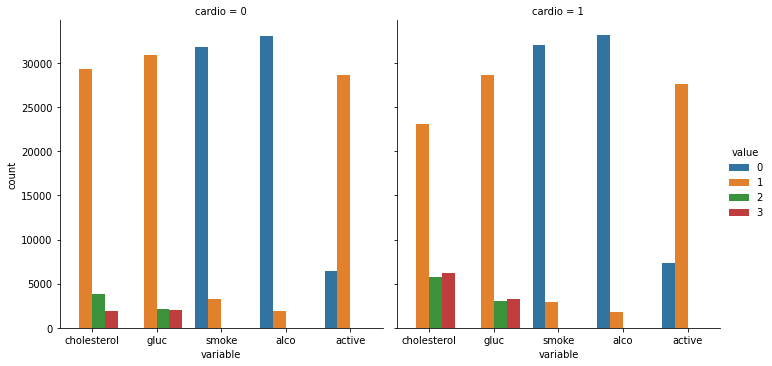

In [8]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

Es claro que los pacientes con CVD tiene niveles mayores de colesterol y glucosa en sangre. Y en términos generales, con menos actividad física.

Para poder saber si el valor "1" se refiere a mujeres o hombres (en la columna `gender`), vamos a calcular la media de la altura por sexo. Suponemos que los hombres, en promedio, son mas altos que las mujeres.

In [28]:
df.groupby('gender')['height'].mean()

gender
1    162.055434
2    169.251915
Name: height, dtype: float64

El promedio para el valor "2" es mayor que el de "1". Por lo tanto, "1" representa a las mujeres,

Veamos como se distribuyen en el dataset:

In [11]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Quién consume mas frecuentemente alcohol? Mujeres u hombres?

In [12]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

Entonces, los hombres consumen, en promedio, mas frecuentemente alcohol que las mujeres.

Ahora, obtenemos las participaciones relativas:

In [13]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

Para obtener como se distribuye la _clase objetivo_ entre hombres y mujeres, también se puede utilizar `crosstab`

In [29]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.332879,0.178893
1,0.319810,0.168418


### Cleaning Data

Are there any `NA`s or missing values in a dataset?

In [30]:
df.isnull().values.any()

False

If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [31]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228,53.338798,27.170628
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,6.746864,4.404588
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,16.049383
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.259585
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.752066
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,46.666667


Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [17]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [18]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [19]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


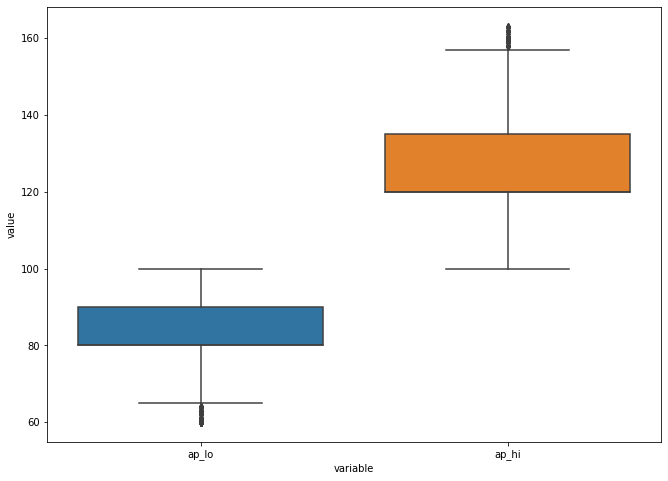

In [20]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

#### Análisis multivariado

Puede resultar de utilidad utilizar una matriz de correlación:

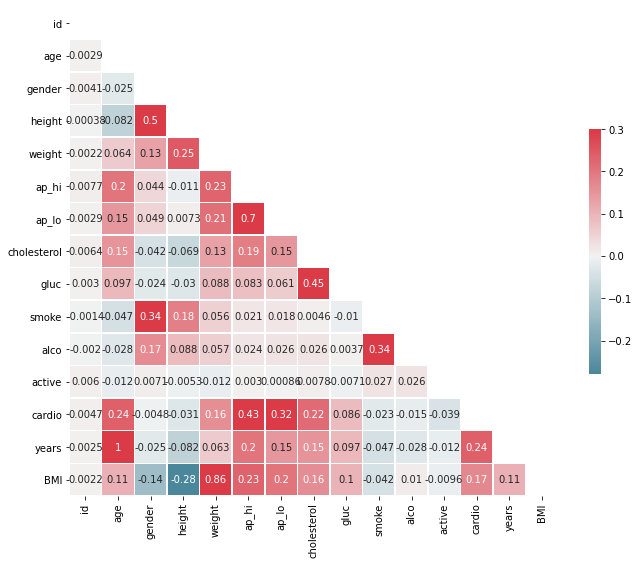

In [37]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Como podemos observar, `age` y `cholesterol` tiene un impacto significativo, pero no altamente correlacionado con la _clase objetivo_

Vamos a crear un `violinplot` para mostrar la distribución de la altura en los diferentes sexos. Tomando sólo el valor medio de la altura y el peso para cada valor de la variable `gender` puede no ser suficiente para determinar si '1' equivale a hombre o mujer.

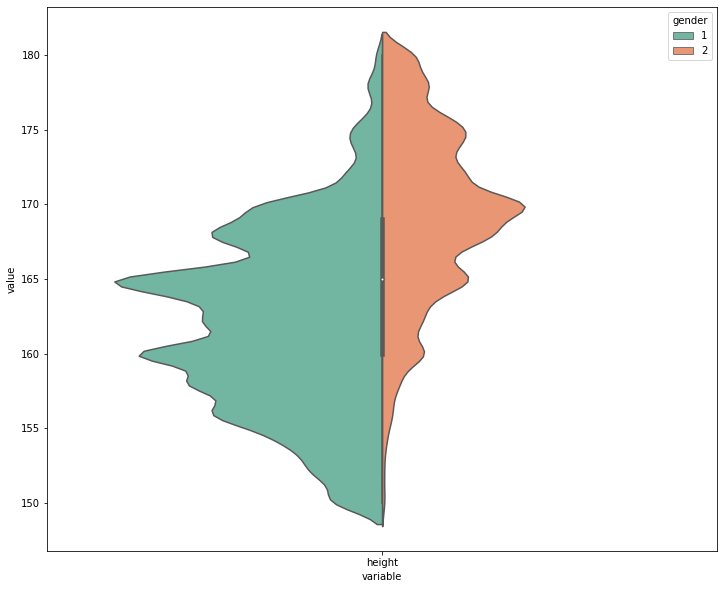

In [38]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Vamos a crear una nueva variable: Body Mass Index (BMI) ó índice de masa muscular.

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

y comparamos el promedio de BMI para las personas sanas con el promedio de BMI para personas enfermas.

(los valores normales de BMI se encuentran en 18.5 y 25)

In [1]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

NameError: name 'df' is not defined

Las mujeres que beben alcohol tienen un mayor riesgo de CVD que los hombres que consumen alochol, según su BMI.

*To be continued*